PARTE 3

In [27]:
from math import comb
from time import perf_counter
import numpy as np
import matplotlib.pyplot as plt

In [28]:
class Caminos:
    def __init__(self,N,M):
         self.N = N
         self.M = M

    def contador1(self):
         # Solución usando combinatoria
         return comb(self.N + self.M - 2, self.N - 1)
    
    def contador2(self):
        #Usando iteraciones 
        # Matriz de tamaño N x M con ceros
        A = np.zeros((self.N, self.M))
        #Caso base
        for i in range(self.N):
            A[i][0] = 1 
        for j in range(self.M):
            A[0][j] = 1 
        #Forma iterativa de contar los caminos:  
        for i in range(1, self.N):
            for j in range(1, self.M):
                A[i][j] = A[i - 1][j] + A[i][j - 1]
        return A[self.N - 1][self.M - 1] #Representa el número total de caminos posibles para llegar
  

         

In [29]:
#Prueba 
N =3
M =3
A = Caminos(N, M)  # Crear una instancia de la clase PCBPaths
B = A.contador1()
print(B)
C = A.contador2()
print(C)


6
6.0


PARTE 3.1

In [40]:
class Caminos:
    def __init__(self,N,M):
         self.N = N
         self.M = M

    def contador1(self):
         # Solución usando combinatoria
         return comb(self.N + self.M - 2, self.N - 1)
    
    def contador2(self):
        #Usando iteraciones 
        # Matriz de tamaño N x M con ceros
        A = np.zeros((self.N, self.M))
        #Caso base
        for i in range(self.N):
            A[i][0] = 1 
        for j in range(self.M):
            A[0][j] = 1 
        #Forma iterativa de contar los caminos:  
        for i in range(1, self.N):
            for j in range(1, self.M):
                A[i][j] = A[i - 1][j] + A[i][j - 1]
        return A[self.N - 1][self.M - 1] #Representa el número total de caminos posibles para llegar
    
    def tiempo_contador1(self):
        # Método para medir el tiempo de ejecución de contador1
        tiempo_inicio = perf_counter()
        resultado = self.contador1()
        tiempo_total = perf_counter() - tiempo_inicio
        return tiempo_total

    def tiempo_contador2(self):
        # Método para medir el tiempo de ejecución de contador2
        tiempo_inicio = perf_counter()
        resultado = self.contador2()
        tiempo_total = perf_counter() - tiempo_inicio
        return tiempo_total


In [41]:
#Prueba 
N =3
M =3
A = Caminos(N, M)  # Crear una instancia de la clase PCBPaths
D = A.tiempo_contador1()
F = A.tiempo_contador2()
print(D)
print(F)

3.5709999792743474e-06
2.643400148372166e-05


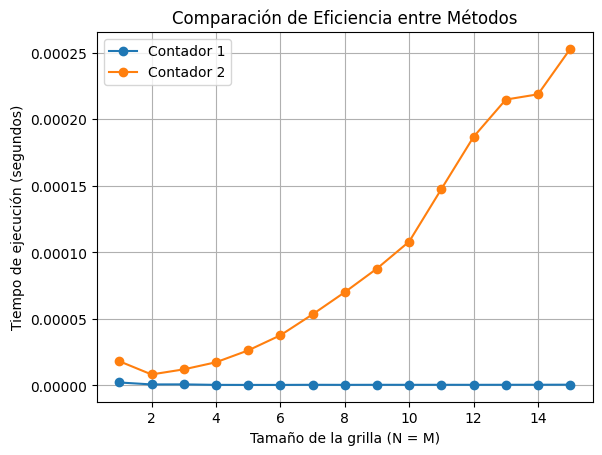

In [44]:
#Prueba

# Listas para almacenar los tiempos de ejecución
t_contador1 = []
t_contador2 = []

# Bucle para medir el tiempo de ejecución de cada método
for size in range(1, 16):  
    caminos = Caminos(size, size)
    

    tiempo_total1 = caminos.tiempo_contador1()
    t_contador1.append(tiempo_total1)

    tiempo_total2 = caminos.tiempo_contador2()
    t_contador2.append(tiempo_total2)

# Gráficos de comparación de tiempos de ejecución
plt.plot(range(1, 16), t_contador1, label='Contador 1', marker='o')
plt.plot(range(1, 16), t_contador2, label='Contador 2', marker='o')
plt.xlabel('Tamaño de la grilla (N = M)')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Comparación de Eficiencia entre Métodos')
plt.legend()
plt.grid(True)
plt.savefig('tiempos_ejecucion_comparacion.svg')
plt.show()



PARTE 3.2

In [33]:
class Caminos:
    def __init__(self,N,M):
         self.N = N
         self.M = M

    def contador1(self):
         # Solución usando combinatoria
         return comb(self.N + self.M - 2, self.N - 1)
    
    def contador2(self):
        #Usando iteraciones 
        # Matriz de tamaño N x M con ceros
        A = np.zeros((self.N, self.M))
        #Caso base
        for i in range(self.N):
            A[i][0] = 1 
        for j in range(self.M):
            A[0][j] = 1 
        #Forma iterativa de contar los caminos:  
        for i in range(1, self.N):
            for j in range(1, self.M):
                A[i][j] = A[i - 1][j] + A[i][j - 1]
        return A[self.N - 1][self.M - 1] #Representa el número total de caminos posibles para llegar
    
    
    def medir_tiempo(self, func):
        tiempo_inicio = perf_counter()
        resultado = func()
        tiempo_total = perf_counter() - tiempo_inicio
        return tiempo_total

In [34]:
# Ejemplo de uso
caminos = Caminos(10, 10)

# Medir tiempo de ejecución usando medir_tiempo
tiempo1 = caminos.medir_tiempo(caminos.contador1)
tiempo2 = caminos.medir_tiempo(caminos.contador2)

print(f"Tiempo de ejecución de contador1 para N=10, M=10: {tiempo1:.6f} segundos")
print(f"Tiempo de ejecución de contador2 para N=10, M=10: {tiempo2:.6f} segundos")


Tiempo de ejecución de contador1 para N=10, M=10: 0.000004 segundos
Tiempo de ejecución de contador2 para N=10, M=10: 0.000145 segundos


PARTE 3.3 y 3.4

In [35]:
#Decorador
tiempos_ejecucion = []

def almacenar_tiempo(func):
    def nueva_func(a, b):
        tiempo_inicio = perf_counter()
        resultado = func(a, b)
        tiempo_total = perf_counter() - tiempo_inicio
        tiempos_ejecucion.append((func.__name__, tiempo_total))
        return resultado
    return nueva_func


In [36]:
import numpy as np

class Caminos:
    def __init__(self, N, M):
        self.N = N
        self.M = M

    def contador1(self):
        # Solución usando combinatoria
        return comb(self.N + self.M - 2, self.N - 1)

    def contador2(self):
        # Solución usando programación dinámica
        A = np.zeros((self.N, self.M))
        for i in range(self.N):
            A[i][0] = 1
        for j in range(self.M):
            A[0][j] = 1
        for i in range(1, self.N):
            for j in range(1, self.M):
                A[i][j] = A[i - 1][j] + A[i][j - 1]
        return A[self.N - 1][self.M - 1]

    @almacenar_tiempo
    def calcular_con_tiempo(self, metodo):
        if metodo == 'contador1':
            return self.contador1()
        elif metodo == 'contador2':
            return self.contador2()
        else:
            raise ValueError("Método no válido, Use 'contador1' o 'contador2'.")


In [37]:
# Prueba
caminos = Caminos(10, 10)

resultado1 = caminos.calcular_con_tiempo('contador1')
tiempo1 = tiempos_ejecucion[-1][1]  
print(f"Tiempo de ejecución de contador1 para N=10, M=10: {tiempo1:.6f} segundos")
resultado2 = caminos.calcular_con_tiempo('contador2')
tiempo2 = tiempos_ejecucion[-1][1]  
print(f"Tiempo de ejecución de contador2 para N=10, M=10: {tiempo2:.6f} segundos")



Tiempo de ejecución de contador1 para N=10, M=10: 0.000005 segundos
Tiempo de ejecución de contador2 para N=10, M=10: 0.000088 segundos


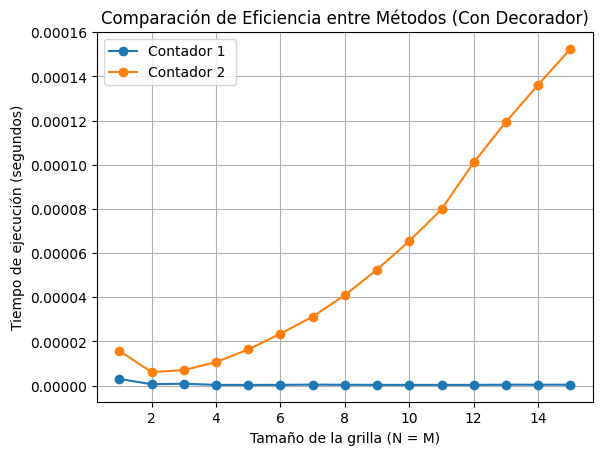

In [38]:
# Listas para almacenar los tiempos de ejecución por tamaño
tamanos = range(1, 16)
tiempos_contador1 = []
tiempos_contador2 = []

# Bucle para medir los tiempos de ejecución para varios tamaños de grilla
for size in tamanos:
    caminos = Caminos(size, size)
    
    # Medir tiempo para contador1
    caminos.calcular_con_tiempo('contador1')
    tiempo1 = tiempos_ejecucion[-1][1]  # Obtener el último tiempo almacenado para contador1
    tiempos_contador1.append(tiempo1)

    # Medir tiempo para contador2
    caminos.calcular_con_tiempo('contador2')
    tiempo2 = tiempos_ejecucion[-1][1]  # Obtener el último tiempo almacenado para contador2
    tiempos_contador2.append(tiempo2)


plt.plot(tamanos, tiempos_contador1, label='Contador 1 ', marker='o')
plt.plot(tamanos, tiempos_contador2, label='Contador 2 ', marker='o')
plt.xlabel('Tamaño de la grilla (N = M)')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Comparación de Eficiencia entre Métodos (Con Decorador)')
plt.legend()
plt.grid(True)
plt.savefig('tiempos_ejecucion_comparacion_con_decorador.svg')
plt.show()